<a href="https://colab.research.google.com/github/sarath-menon/can_final/blob/master/Copy_of_train_hello_world_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train a Simple TensorFlow Lite for Microcontrollers model

This notebook demonstrates the process of training a 2.5 kB model using TensorFlow and converting it for use with TensorFlow Lite for Microcontrollers. 

Deep learning networks learn to model patterns in underlying data. Here, we're going to train a network to model data generated by a [sine](https://en.wikipedia.org/wiki/Sine) function. This will result in a model that can take a value, `x`, and predict its sine, `y`.

The model created in this notebook is used in the [hello_world](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/lite/micro/examples/hello_world) example for [TensorFlow Lite for MicroControllers](https://www.tensorflow.org/lite/microcontrollers/overview).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Configure Defaults

In [1]:
# !git clone https://github.com/tiiuae/UAV-Propeller-Anomaly-Audio-Dataset.git
%cd
%cd /content/UAV-Propeller-Anomaly-Audio-Dataset
!python3 data_prepare.py

/root
[Errno 2] No such file or directory: '/content/UAV-Propeller-Anomaly-Audio-Dataset'
/root
python3: can't open file '/root/data_prepare.py': [Errno 2] No such file or directory


In [2]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

## Setup Environment

Install Dependencies

Import Dependencies

In [3]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## Dataset

### 1. Generate Data

The code in the following cell will generate a set of random `x` values, calculate their sine values, and display them on a graph.

In [4]:
!pip install git+https://github.com/ARM-software/CMSIS_5.git@5.8.0#egg=CMSISDSP\&subdirectory=CMSIS/DSP/PythonWrapper

%cd
%cd /content/
!git clone https://github.com/sarath-menon/UAV-Propeller-Anomaly-Audio-Dataset.git
%cd UAV-Propeller-Anomaly-Audio-Dataset
!python3 data_prepare.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ARM-software/CMSIS_5.git (to revision 5.8.0) to /tmp/pip-install-_pqj2uub/cmsisdsp_c9c39b79185f497f9dde96e86eb94ed2
  Running command git clone --filter=blob:none --quiet https://github.com/ARM-software/CMSIS_5.git /tmp/pip-install-_pqj2uub/cmsisdsp_c9c39b79185f497f9dde96e86eb94ed2
  Running command git checkout -q 649bd8aa41ed7d86b416c89cdb4b820b899a4cbc
  Resolved https://github.com/ARM-software/CMSIS_5.git to commit 649bd8aa41ed7d86b416c89cdb4b820b899a4cbc
  Preparing metadata (setup.py) ... done
  Created wheel for CMSISDSP: filename=CMSISDSP-1.0.0-cp310-cp310-linux_x86_64.whl size=1432071 sha256=067e3b37a777c4e82aacb7a8cc20751e0aad86da1705bca5ca55a3a64f2b27da
  Stored in directory: /tmp/pip-ephem-wheel-cache-z0xu6uln/wheels/91/e0/e0/a9f82222f5d1eac8dca08f231ea3bffa47d79f51a2da4355f1
Successfully built CMSISDSP
/root
/content
Cloning into 'UAV-Propeller-An

In [5]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
import seaborn as sns
# Math is Python's math library
import math

import os
import pathlib


from scipy.fft import fft, fftfreq
from tensorflow.keras import datasets, layers, models

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
%cd
%cd /content/UAV-Propeller-Anomaly-Audio-Dataset

normal_path = pathlib.Path("NewDataset/normal")
one_broken_path = pathlib.Path("NewDataset/one_broken")
two_broken_path = pathlib.Path("NewDataset/two_broken")

normal_list = list(normal_path.rglob("*.wav"))
one_broken_list = list(one_broken_path.rglob("*.wav"))
two_broken_list = list(two_broken_path.rglob("*.wav"))

/root
/content/UAV-Propeller-Anomaly-Audio-Dataset


In [7]:
from cmsisdsp import arm_float_to_q15, arm_float_to_q7, arm_rfft_instance_q15, arm_rfft_init_q15, arm_rfft_q15
from numpy import pi as PI
from cmsisdsp import arm_cos_f32, arm_float_to_q15
from cmsisdsp import arm_mult_q15
from cmsisdsp import arm_rfft_instance_q15, arm_rfft_init_q15, arm_rfft_q15, arm_cmplx_mag_q15
from scipy.io import wavfile


window_count =  16
window_size = 256
audio_sample_rate = 16000
step_size = int(audio_sample_rate/window_count)

# create the hanning window
hanning_window_f32 = np.zeros(window_size)
for i in range(window_size):
    hanning_window_f32[i] = 0.5 * (1 - arm_cos_f32(2 * PI * i / window_size ))
  
hanning_window_q15 = arm_float_to_q15(hanning_window_f32)

# Calculate the number of windows
number_of_windows = int(1 + (audio_sample_rate - window_size) // step_size)

# Initialize the FFT
rfft_instance_q15 = arm_rfft_instance_q15()
status = arm_rfft_init_q15(rfft_instance_q15, window_size, 0, 1)

# Calculate the FFT Output size
fft_size = int(window_size // 2 )


def convert_to_arm_dsp_spect_efficient(audio_samples):
    # Convert the audio to q15
    audio_samples_q15 = arm_float_to_q15(audio_samples/200)
    
    # Create an empty array to hold the Spectrogram
    spectrogram_q15 = np.empty((number_of_windows,fft_size),dtype=np.float32)
    spectrogram_avg_q15 = np.empty((fft_size),dtype=np.float32)
    
    
    start_index = 0
    # Apply hanning window and apply fft
    for index in range(number_of_windows):
        # Take the window from the waveform.
        audio_window_q15 = audio_samples_q15[start_index:start_index + window_size]

        # Apply the Hanning Window.
        processed_audio_q15 = arm_mult_q15(audio_window_q15, hanning_window_q15)

        # Calculate the FFT
        rfft_q15 = arm_rfft_q15(rfft_instance_q15, processed_audio_q15)

        # Take the absolute value of the FFT and add to the abg
        rfft_mag_q15 = arm_cmplx_mag_q15(rfft_q15)[:fft_size]
        
#         print(np.max(rfft_mag_q15))

        spectrogram_q15[index] =  rfft_mag_q15 / 4

        # Increase the start index of the window by the overlap amount.
        start_index += step_size
    
    
    # average across frequencies
    for i in range(fft_size):
        spectrogram_avg_q15[i] = 0
        
        for j in range(number_of_windows):
            spectrogram_avg_q15[i] = spectrogram_avg_q15[i] + spectrogram_q15[j, i]
    
        
    return spectrogram_avg_q15

In [155]:
def read_wave_file(file):
    # read sample rate and data from wave file
    original_sample_rate, orginal_audio_data = wavfile.read(file)
    
    orginal_audio_data = np.float32(orginal_audio_data)
    audio_data_float32 = orginal_audio_data / np.finfo(orginal_audio_data.dtype).max

    audio_data_float32 = orginal_audio_data
    return audio_data_float32, original_sample_rate


normal_len = len(normal_list)
normal_data = np.empty([normal_len ,128],dtype=np.float32)
normal_labels = [0] *normal_len 

for i, path in enumerate(normal_list):
    audio_samples, audio_sample_rate = read_wave_file(path);
    spectrogram_q15 = convert_to_arm_dsp_spect_efficient(audio_samples);
    normal_data[i,:] = spectrogram_q15;

    
one_broken_len = len(one_broken_list)
one_broken_data = np.empty([one_broken_len,128],dtype=np.float32)
one_broken_labels = [1] * one_broken_len

for i, path in enumerate(one_broken_list):
    audio_samples, audio_sample_rate = read_wave_file(path);
    spectrogram_q15 = convert_to_arm_dsp_spect_efficient(audio_samples);
    one_broken_data[i,:] = spectrogram_q15;

two_broken_len = len(two_broken_list)
two_broken_data = np.empty([two_broken_len,128],dtype=np.float32)
two_broken_labels = [2] * two_broken_len

for i, path in enumerate(two_broken_list):
    audio_samples, audio_sample_rate = read_wave_file(path);
    spectrogram_q15 = convert_to_arm_dsp_spect_efficient(audio_samples);
    two_broken_data[i,:] = spectrogram_q15;
    
x_values = np.concatenate((normal_data,one_broken_data), axis=0)
y_values = normal_labels + one_broken_labels 
y_values = np.array(y_values)
y_values = y_values.reshape(y_values.size,1)

# # Shuffle the values to guarantee they're not in order
# shuffling the two arrays in unison
shuffler = np.random.permutation(len(y_values))

x_values = x_values[shuffler]
y_values = y_values[shuffler]

SAMPLES = x_values.shape[0]

### 3. Split the Data
We now have a noisy dataset that approximates real world data. We'll be using this to train our model.

To evaluate the accuracy of the model we train, we'll need to compare its predictions to real data and check how well they match up. This evaluation happens during training (where it is referred to as validation) and after training (referred to as testing) It's important in both cases that we use fresh data that was not already used to train the model.

The data is split as follows:
  1. Training: 60%
  2. Validation: 20%
  3. Testing: 20% 

The following code will split our data and then plots each set as a different color:


In [169]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.8 * SAMPLES)
TEST_SPLIT = int(0.1 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.shape[0] + x_validate.shape[0]+ x_test.shape[0]) ==  SAMPLES

# # Plot the data in each partition in different colors:
# plt.plot(x_train, y_train, 'b.', label="Train")
# plt.plot(x_test, y_test, 'r.', label="Test")
# plt.plot(x_validate, y_validate, 'y.', label="Validate")
# plt.legend()
# plt.show()


## Training

This graph of _mean absolute error_ tells another story. We can see that training data shows consistently lower error than validation data, which means that the network may have _overfit_, or learned the training data so rigidly that it can't make effective predictions about new data.

In addition, the mean absolute error values are quite high, ~0.305 at best, which means some of the model's predictions are at least 30% off. A 30% error means we are very far from accurately modelling the sine wave function.

**3. Actual vs Predicted Outputs**

To get more insight into what is happening, let's check its predictions against the test dataset we set aside earlier:

Oh dear! The graph makes it clear that our network has learned to approximate the sine function in a very limited way.

The rigidity of this fit suggests that the model does not have enough capacity to learn the full complexity of the sine wave function, so it's only able to approximate it in an overly simplistic way. By making our model bigger, we should be able to improve its performance.

## Training a Larger Model

### 1. Design the Model
To make our model bigger, let's add an additional layer of neurons. The following cell redefines our model in the same way as earlier, but with 16 neurons in the first layer and an additional layer of 16 neurons in the middle:

In [209]:
from tensorflow.keras import layers
num_labels = 1


model = tf.keras.Sequential([
            layers.Dense(8, activation="relu", input_shape=(128,)),    # (batch, 16)
            layers.Dense(4, activation='relu'),    # (batch, 4)
            layers.Dense(num_labels, activation='sigmoid')  
    ])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)   

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 1032      
                                                                 
 dense_28 (Dense)            (None, 4)                 36        
                                                                 
 dense_29 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


### 2. Train the Model ###

We'll now train and save the new model.

In [210]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


27/27 [==============================] - 2s 9ms/step - loss: 32.4066 - accuracy: 0.4792 - val_loss: 0.8654 - val_accuracy: 0.6429
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6494 - val_loss: 0.5512 - val_accuracy: 0.6952
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.6827 - val_loss: 0.5499 - val_accuracy: 0.7000
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.6893 - val_loss: 0.5468 - val_accuracy: 0.7000
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.6905 - val_loss: 0.5408 - val_accuracy: 0.7095
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.7006 - val_loss: 0.5244 - val_accuracy: 0.7238
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5465 - accuracy: 0.7161 - val_loss: 0.4988 - val_accuracy: 0.7429
Epoch 8/100
27/27 [=====

Text(0, 0.5, 'Accuracy [%]')

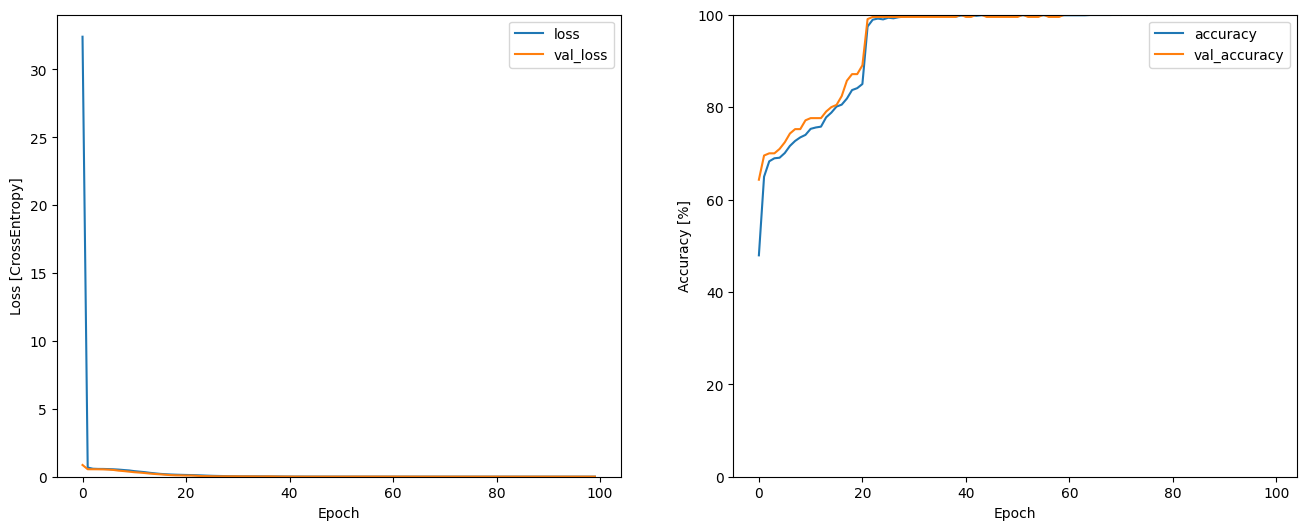

In [211]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

7/7 [==============================] - 0s 2ms/step


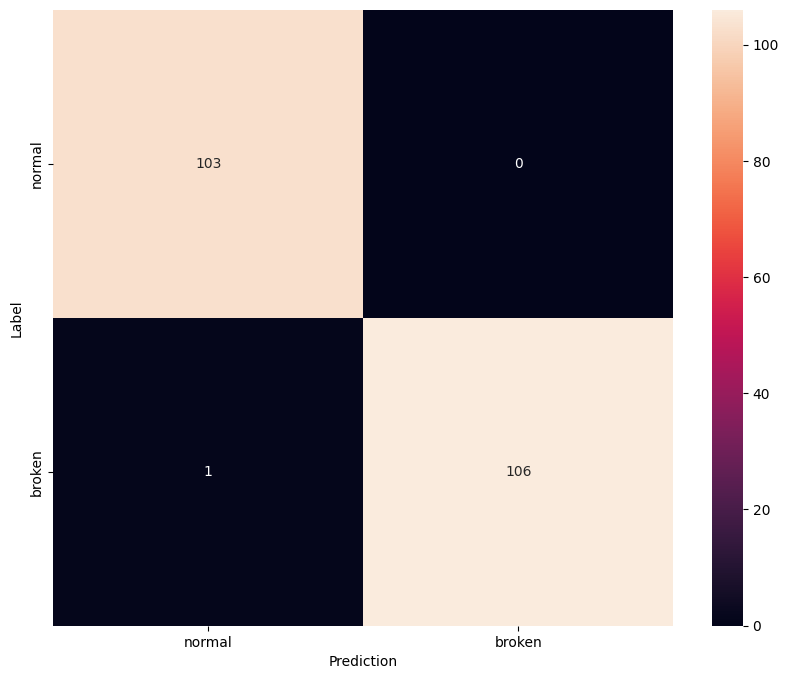

In [212]:
label_names = ['normal', 'broken']

y_pred = model.predict(x_test)
y_true = y_test

y_pred = y_pred.reshape(y_pred.size)
y_true =y_true.reshape(y_true.size)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

### 1. Generate Models with or without Quantization
We now have an acceptably accurate model. We'll use the [TensorFlow Lite Converter](https://www.tensorflow.org/lite/convert) to convert the model into a special, space-efficient format for use on memory-constrained devices.

Since this model is going to be deployed on a microcontroller, we want it to be as tiny as possible! One technique for reducing the size of a model is called [quantization](https://www.tensorflow.org/lite/performance/post_training_quantization). It reduces the precision of the model's weights, and possibly the activations (output of each layer) as well, which saves memory, often without much impact on accuracy. Quantized models also run faster, since the calculations required are simpler.

In the following cell, we'll convert the model twice: once with quantization, once without.

In [213]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(500):
    yield([x_train[i].reshape(128)])

# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# # Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset

model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

3992

### 2. Compare Model Performance

To prove these models are accurate even after conversion and quantization, we'll compare their predictions and loss on our test dataset.

**Helper functions**

We define the `predict` (for predictions) and `evaluate` (for loss) functions for TFLite models. *Note: These are already included in a TF model, but not in  a TFLite model.*

In [214]:
def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.shape[0], 128))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # Invoke the interpreter
  y_pred = np.empty((num_labels,x_test_.shape[0]), dtype=output_details["dtype"])

  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i,:]])
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    y_pred[:,i] = output
  
  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

**1. Predictions**

In [215]:
# Calculate predictions
y_test_pred_tf = model.predict(x_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, x_test)
y_test_pred_tflite = predict_tflite(model_tflite, x_test)

7/7 [==============================] - 0s 3ms/step


## Confusion Matrix - Without quantization

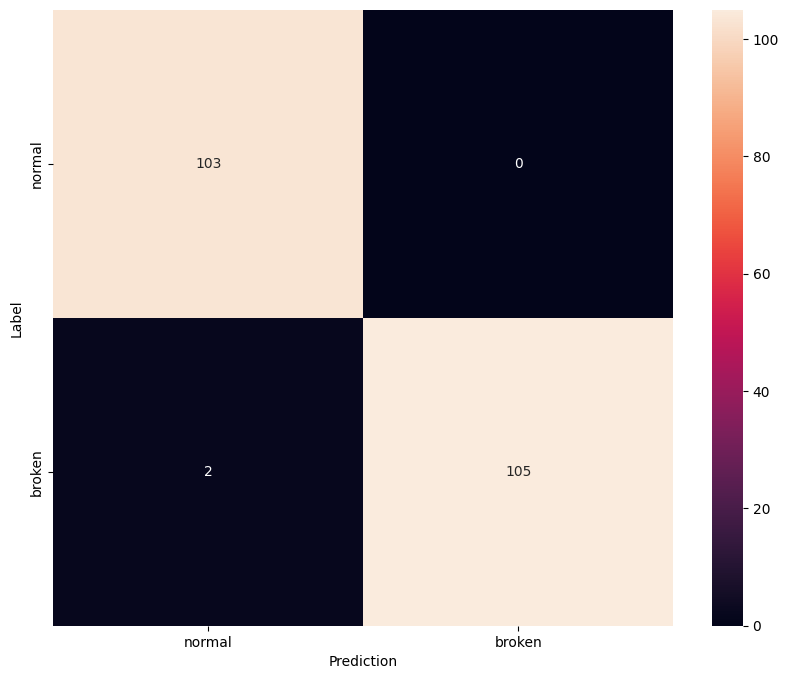

In [216]:
y_pred = y_test_pred_no_quant_tflite
y_true = y_test

y_pred = y_pred.reshape(y_pred.size)
y_true =y_true.reshape(y_true.size)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

## Confusion Matrix - With quantization

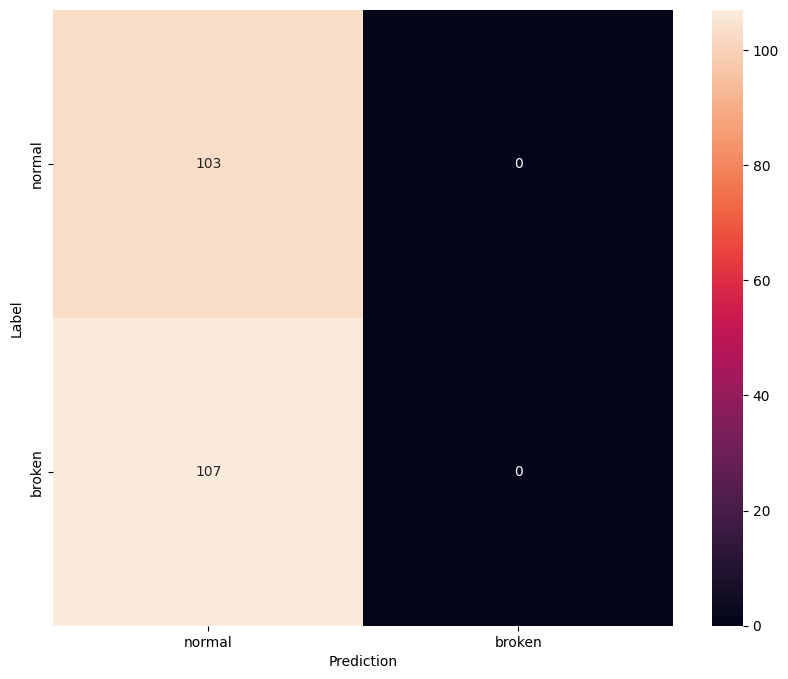

In [217]:
y_pred = y_test_pred_tflite
y_true = y_test

y_pred = y_pred.reshape(y_pred.size)
y_true =y_true.reshape(y_true.size)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()


## Confusion Matrix - With prunibg

In [177]:
y_test_pred_tflite

array([[0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 4.7817738e-23,
        1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e

In [25]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_tflite = os.path.getsize(MODEL_TFLITE)

In [115]:
# Compare size
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tflite} bytes", f"(reduced by {size_no_quant_tflite - size_tflite} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,4096 bytes,
TensorFlow Lite,10928 bytes,(reduced by -6832 bytes)
TensorFlow Lite Quantized,5120 bytes,(reduced by 5808 bytes)


**Summary**

We can see from the predictions (graph) and loss (table) that the original TF model, the TFLite model, and the quantized TFLite model are all close enough to be indistinguishable - even though they differ in size (table). This implies that the quantized (smallest) model is ready to use!

*Note: The quantized (integer) TFLite model is just 300 bytes smaller than the original (float) TFLite model - a tiny reduction in size! This is because the model is already so small that quantization has little effect. Complex models with more weights, can have upto a 4x reduction in size!*

## Generate a TensorFlow Lite for Microcontrollers Model
Convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers.

In [132]:
# # Install xxd if it is not available
# !apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}

## Deploy to a Microcontroller

Follow the instructions in the [hello_world](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/lite/micro/examples/hello_world) README.md for [TensorFlow Lite for MicroControllers](https://www.tensorflow.org/lite/microcontrollers/overview) to deploy this model on a specific microcontroller.

**Reference Model:** If you have not modified this notebook, you can follow the instructions as is, to deploy the model. Refer to the [`hello_world/train/models`](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/train/models) directory to access the models generated in this notebook.

**New Model:** If you have generated a new model, then update the values assigned to the variables defined in [`hello_world/model.cc`](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/model.cc) with values displayed after running the following cell.

In [133]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char g_model[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x8c, 0x00, 0x00, 0x00, 0xe4, 0x00, 0x00, 0x00, 0x84, 0x24, 0x00, 0x00,
  0x94, 0x24, 0x00, 0x00, 0x74, 0x2a, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x2e, 0xdb, 0xff, 0xff,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x90, 0xff, 0xff, 0xff, 0x0a, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x31, 0x34, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x02, 0xdc, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0x0e, 0x